# Analyze Human Trisome Project PLIER model

Marc Subirana-Granés (2024)

Analyze Human Trisome Project PLIER model

# Load libraries/modules

In [39]:
library(here)
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggpubr)
library(stringr)

# Load data

In [6]:
# define output nb
output_nb_path = here('output/nbs/analyze_human_trisome_project_plier_model')
dir.create(output_nb_path, showWarnings = FALSE)

# load model
htp_plier_model_path <- here::here('output/nbs/create_human_trisome_project_plier_model/htp_plier_model_k0.5_frac1.rds')
htp_plier_model <- readRDS(htp_plier_model_path)

# load metadata
path_metadata_GSE190125 <- here::here('data/GSE190125/metadata_GSE190125.csv')
metadata_GSE190125 <- read.csv(path_metadata_GSE190125)
colnames(metadata_GSE190125) <- c('Group', 'Sample')	

here() starts at /home/msubirana/Documents/pivlab/plier_recount3


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Top LVs

In [158]:
htp_plier_model$summary %>% 
dplyr::arrange(FDR) %>%
dplyr::filter(FDR < 0.05 & AUC > 0.7) %>% 
head(20)

pathway                                          LV index AUC      
1  HELLER_HDAC_TARGETS_DN                           77       0.8786256
2  GSE22886_NAIVE_BCELL_VS_NEUTROPHIL_DN            45       0.9404252
3  GSE22886_NAIVE_BCELL_VS_NEUTROPHIL_DN            6        0.9188405
4  GSE29618_BCELL_VS_MONOCYTE_UP                    34       0.9572102
5  HELLER_HDAC_TARGETS_DN                           69       0.8346956
6  GSE29618_BCELL_VS_MONOCYTE_UP                    78       0.9014529
7  JAATINEN_HEMATOPOIETIC_STEM_CELL_DN              58       0.8633963
8  JAATINEN_HEMATOPOIETIC_STEM_CELL_DN              6        0.8393712
9  JAATINEN_HEMATOPOIETIC_STEM_CELL_DN              62       0.8459224
10 GSE34205_HEALTHY_VS_RSV_INF_INFANT_PBMC_DN       62       0.8770630
11 GSE29618_BCELL_VS_MONOCYTE_UP                    31       0.8930712
12 GSE34205_HEALTHY_VS_RSV_INF_INFANT_PBMC_DN       38       0.8615933
13 HELLER_HDAC_TARGETS_SILENCED_BY_METHYLATION_DN   69       0.8111381
14 HELLER_HDAC_TARGETS_SILENCED_BY_METHYLATION_DN   68       0.8208804
15 GSE29618_BCELL_VS_MONOCYTE_UP                    51       0.8690587
16 GSE29618_BCELL_VS_MDC_DAY7_FLU_VACCINE_UP        34       0.8870749
17 REACTOME_3_UTR_MEDIATED_TRANSLATIONAL_REGULATION 1        0.9989911
18 GSE10325_LUPUS_BCELL_VS_LUPUS_MYELOID_UP         34       0.8848222
19 DANG_MYC_TARGETS_UP                              68       0.9390725
20 GSE22886_NAIVE_BCELL_VS_NEUTROPHIL_DN            3        0.8833678
   p-value      FDR         
1  5.316805e-27 1.038904e-23
2  1.147191e-25 1.120806e-22
3  4.664853e-23 3.038374e-20
4  1.937181e-22 9.463129e-20
5  5.670227e-21 2.215925e-18
6  3.106704e-19 1.011750e-16
7  1.444450e-18 4.032080e-16
8  4.905479e-18 9.950881e-16
9  4.221076e-18 9.950881e-16
10 5.092570e-18 9.950881e-16
11 6.695763e-18 1.186808e-15
12 7.288483e-18 1.186808e-15
13 9.085504e-18 1.365621e-15
14 1.214157e-17 1.694616e-15
15 1.535559e-17 2.000322e-15
16 1.762335e-17 2.152252e-15
17 2.113487e-17 2.429267e-15
18 2.678290e-17 2.907433e-15
19 3.239326e-17 3.331391e-15
20 6.716876e-17 6.562388e-15

# Differential LVs (T21 vs D21)

In [160]:
# load B
htp_plier_model_B <- data.frame(htp_plier_model$B)

htp_plier_model_B <- htp_plier_model_B %>% 
  dplyr::mutate(LV = rownames(htp_plier_model_B)) %>%
  dplyr::select(LV, everything()) %>%
  `rownames<-`(1:nrow(htp_plier_model_B))

# Transpose Data for Analysis
lv_data_long <- htp_plier_model_B %>% 
  pivot_longer(cols = -LV, names_to = "Sample", values_to = "Value") %>% 
    dplyr::left_join(metadata_GSE190125)

# Perform Wilcoxon test for each LV and store results in a data frame
wilcox_results <- lv_data_long %>%
  group_by(LV) %>%
  summarise(p_value = wilcox.test(Value ~ Group)$p.value) %>%
  mutate(significant = p_value < 0.05)

# Filter the data to include only significant LVs
significant_LVs <- wilcox_results %>%
  filter(significant) %>%
  pull(LV)

filtered_data <- sig_lv_data_long %>%
  filter(LV %in% significant_LVs)

# Calculate mean values for each group and LV
mean_values <- filtered_data %>%
  group_by(LV, Group) %>%
  summarise(mean_value = mean(Value), .groups = 'drop')

head(filtered_data)

Joining with `by = join_by(Sample)`


LV                                  Sample    Value     Group  
1 1,REACTOME_PEPTIDE_CHAIN_ELONGATION HTP0001B2 11.062476 Control
2 1,REACTOME_PEPTIDE_CHAIN_ELONGATION HTP0005A3 13.315868 T21    
3 1,REACTOME_PEPTIDE_CHAIN_ELONGATION HTP0012A2 11.416451 T21    
4 1,REACTOME_PEPTIDE_CHAIN_ELONGATION HTP0015A4  2.332951 T21    
5 1,REACTOME_PEPTIDE_CHAIN_ELONGATION HTP0017A4 10.181714 T21    
6 1,REACTOME_PEPTIDE_CHAIN_ELONGATION HTP0018B3 15.671168 Control

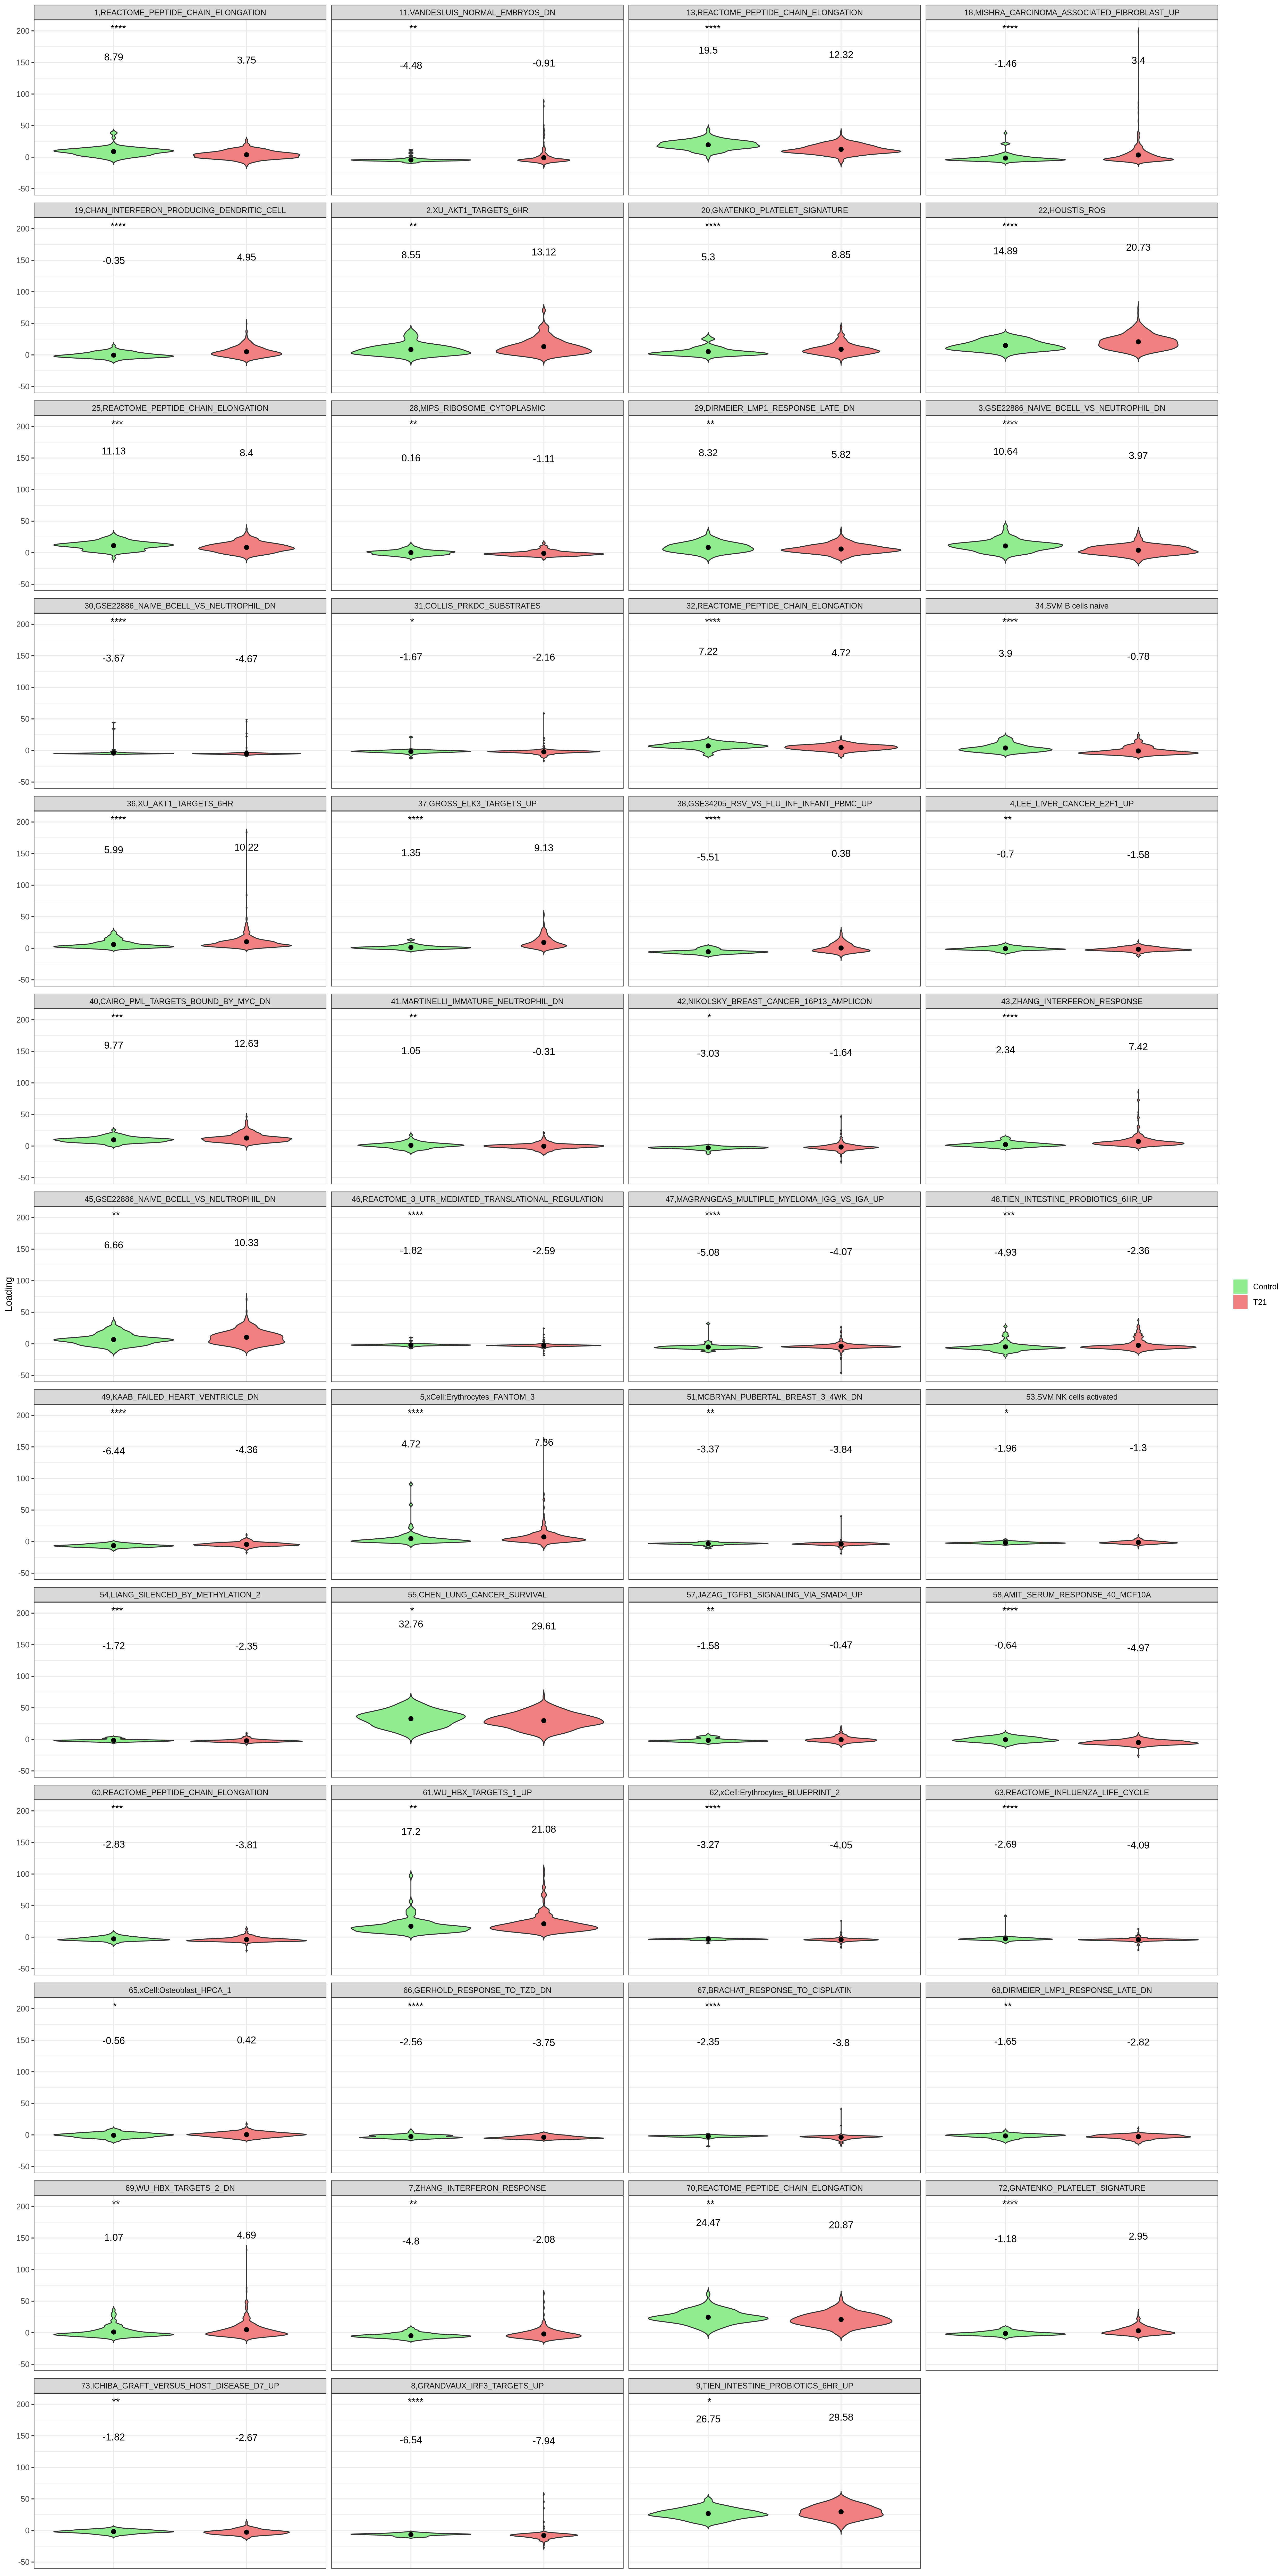

In [68]:
options(repr.plot.width = 20, repr.plot.height = 40, repr.plot.res = 250)

# Create the plot with only significant LVs and fewer columns
plot <- ggplot(filtered_data, aes(x = Group, y = Value, fill = Group)) +
  geom_violin(trim = FALSE) +
  stat_summary(fun = mean, geom = "point", color = "black", size = 2) +
  geom_text(data = mean_values, aes(x = Group, y = mean_value, label = round(mean_value, 2)), 
            color = "black", nudge_y = 150) + # Adjust mean values as text
  facet_wrap(~ LV, scales = "free_x", ncol = 4) + # Adjust the number of columns here
  labs(x = NULL, y = "Loading") +
  theme_bw() +
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    legend.title = element_blank()
  ) +
  scale_fill_manual(values = c("Control" = "lightgreen", "T21" = "lightcoral")) +
  stat_compare_means(method = "wilcox.test", label = "p.signif") +
  guides(
    fill = guide_legend(override.aes = list(shape = c(NA, NA), linetype = c(0, 0))),
    color = guide_legend(override.aes = list(shape = c(16), linetype = c(0), color = "black"))
  )

# Display the plot
print(plot)

# LVs significant in the model and significant in distingish T21 vs D21

In [161]:
summary_n_significant_LVs <- htp_plier_model$summary %>% 
dplyr::arrange(FDR) %>%
dplyr::filter(FDR < 0.05 & AUC > 0.7) %>% 
dplyr::filter(`LV index` %in% n_significant_LVs) %>% 
pull(`LV index`) %>% 
unique() %>% 
as.numeric()

options(repr.plot.width = 30, repr.plot.height = 60, repr.plot.res = 250)

library(PLIER) 


PLIER::plotU(plierRes = htp_plier_model,
             indexCol = c(summary_n_significant_LVs),
             top = 10, 
            fontsize = 20)

# LVs related to CHR21

In [88]:
patterns <- c('chr21_p11.2', 'chr21_q11.2', 'chr21_q21.1', 'chr21_q21.2', 'chr21_q21.3',
              'chr21_q22.11', 'chr21_q22.12', 'chr21_q22.2', 'chr21_q22.13', 'chr21_q22.3', 
              'chr21_p12', 'chr21')

htp_plier_model$summary %>%
  filter(str_detect(pathway, paste(patterns, collapse = '|')))

pathway     LV index AUC       p-value   FDR      
1 chr21_q21.2 13       0.5080934 0.4802206 0.5042187
2 chr21_q21.2 16       0.4613540 0.5943532 0.6138298
3 chr21_q21.2 21       0.2759768 0.9166204 0.9222844
4 chr21_q21.2 25       0.6732119 0.1359026 0.1568540
5 chr21_q21.2 61       0.6578429 0.1611334 0.1836959
6 chr21_q21.2 70       0.6431390 0.1856833 0.2093624

In [93]:
htp_plier_model$summary %>%
dplyr::filter(`LV index` %in% c(61)) %>% 
dplyr::filter(FDR < 0.2 & AUC > 0.6) 

pathway                                                               
1  SVM B cells naive                                                     
2  SVM Plasma cells                                                      
3  SVM T cells CD8                                                       
4  REACTOME_IRON_UPTAKE_AND_TRANSPORT                                    
5  REACTOME_3_UTR_MEDIATED_TRANSLATIONAL_REGULATION                      
6  REACTOME_PEPTIDE_CHAIN_ELONGATION                                     
7  REACTOME_NONSENSE_MEDIATED_DECAY_ENHANCED_BY_THE_EXON_JUNCTION_COMPLEX
8  KEGG_RIBOSOME                                                         
9  MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX                               
10 MIPS_RIBOSOME_CYTOPLASMIC                                             
11 REACTOME_INFLUENZA_LIFE_CYCLE                                         
12 BILANGES_SERUM_AND_RAPAMYCIN_SENSITIVE_GENES                          
13 LEIN_LOCALIZED_TO_PROXIMAL_DENDRITES                                  
14 NING_CHRONIC_OBSTRUCTIVE_PULMONARY_DISEASE_UP                         
15 TIEN_INTESTINE_PROBIOTICS_6HR_UP                                      
16 ODONNELL_TARGETS_OF_MYC_AND_TFRC_UP                                   
17 MAGRANGEAS_MULTIPLE_MYELOMA_IGG_VS_IGA_DN                             
18 HELLER_HDAC_TARGETS_SILENCED_BY_METHYLATION_DN                        
19 RIZKI_TUMOR_INVASIVENESS_2D_DN                                        
20 ZHU_CMV_24_HR_DN                                                      
21 DIRMEIER_LMP1_RESPONSE_EARLY                                          
22 HELLER_HDAC_TARGETS_DN                                                
23 WU_HBX_TARGETS_2_DN                                                   
24 GNATENKO_PLATELET_SIGNATURE                                           
25 RICKMAN_HEAD_AND_NECK_CANCER_D                                        
26 DANG_MYC_TARGETS_UP                                                   
27 NIKOLSKY_BREAST_CANCER_16P13_AMPLICON                                 
28 NATSUME_RESPONSE_TO_INTERFERON_BETA_DN                                
29 XU_AKT1_TARGETS_6HR                                                   
30 WU_HBX_TARGETS_1_UP                                                   
31 ALCALAY_AML_BY_NPM1_LOCALIZATION_UP                                   
32 HOLLEMAN_VINCRISTINE_RESISTANCE_ALL_DN                                
33 CHAUHAN_RESPONSE_TO_METHOXYESTRADIOL_DN                               
34 CHNG_MULTIPLE_MYELOMA_HYPERPLOID_UP                                   
35 GSE29618_BCELL_VS_MONOCYTE_UP                                         
36 GSE3337_CTRL_VS_16H_IFNG_IN_CD8POS_DC_DN                              
37 GSE6269_HEALTHY_VS_FLU_INF_PBMC_DN                                    
38 GSE29618_BCELL_VS_MDC_DAY7_FLU_VACCINE_UP                             
39 chr21_q21.2                                                           
   LV index AUC       p-value      FDR         
1  61       0.6600821 1.833624e-02 2.476090e-02
2  61       0.6840019 1.758318e-02 2.387598e-02
3  61       0.8583861 6.046317e-07 2.934391e-06
4  61       0.6071288 1.710498e-01 1.942077e-01
5  61       0.9134934 1.092322e-11 2.052305e-10
6  61       0.8901327 8.081987e-09 6.342250e-08
7  61       0.9550290 8.837177e-14 3.320739e-12
8  61       0.9963253 3.332071e-13 9.851695e-12
9  61       0.9817172 1.480564e-14 6.727960e-13
10 61       0.9358562 4.968337e-10 5.363608e-09
11 61       0.7034476 8.681292e-05 2.211315e-04
12 61       0.8673954 2.041203e-06 8.468174e-06
13 61       0.6860881 4.944674e-02 6.138433e-02
14 61       0.6900008 1.370521e-04 3.298028e-04
15 61       0.7101820 5.808186e-03 8.804874e-03
16 61       0.6130831 5.643573e-02 6.918157e-02
17 61       0.9069863 1.604456e-03 2.838554e-03
18 61       0.7457310 7.266735e-11 9.792552e-10
19 61       0.7357520 2.323421e-03 3.968500e-03
20 61       0.7283601 3.270306e-04 7.116010e-04
21 61       0.7295552 1.996758e-03 

## LV61 (related to CHR21

In [ ]:
htp_plier_model_B_61 <- htp_plier_model_B %>%
  filter(str_detect(LV, '61'))


# Transpose Data for Analysis
lv_data_long_61 <- htp_plier_model_B_61 %>% 
  pivot_longer(cols = -LV, names_to = "Sample", values_to = "Value") %>% 
    dplyr::left_join(metadata_GSE190125)

# Calculate mean values for each group and LV
mean_values_61 <- lv_data_long_61 %>%
  group_by(LV, Group) %>%
  summarise(mean_value = mean(Value), .groups = 'drop')

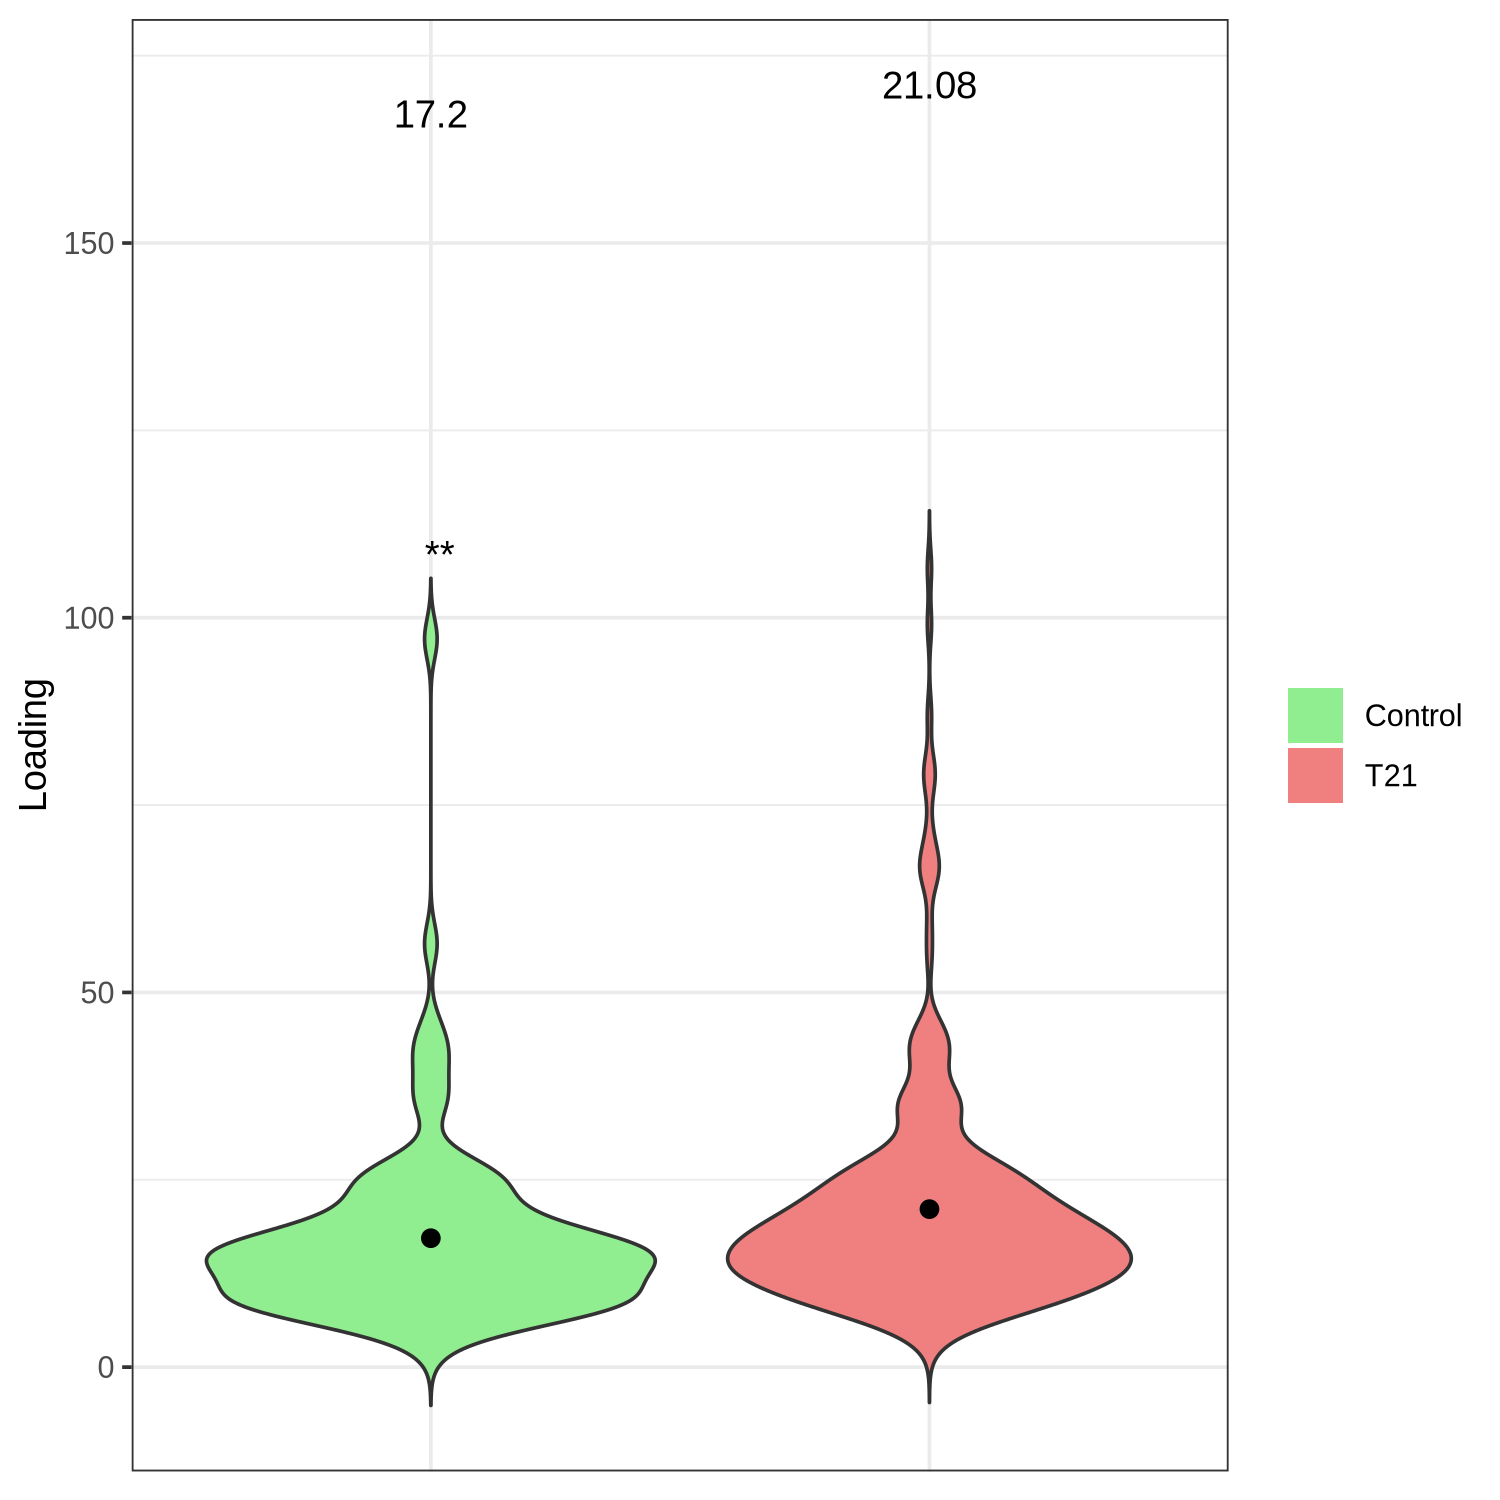

In [108]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 250)

# Ensure mean_values_61 is numeric
mean_values_61 <- mean_values_61 %>%
  mutate(mean_value = as.numeric(mean_value))

# Create the plot with only significant LVs and fewer columns
plot <- ggplot(lv_data_long_61, aes(x = Group, y = Value, fill = Group)) +
  geom_violin(trim = FALSE) +
  stat_summary(fun = mean, geom = "point", color = "black", size = 2) +
  geom_text(data = mean_values_61, aes(x = Group, y = mean_value, label = round(mean_value, 2)), 
            color = "black", nudge_y = 150) + # Adjust mean values as text
  labs(x = NULL, y = "Loading") +
  theme_bw() +
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    legend.title = element_blank()
  ) +
  scale_fill_manual(values = c("Control" = "lightgreen", "T21" = "lightcoral")) +
  stat_compare_means(method = "wilcox.test", label = "p.signif") +
  guides(
    fill = guide_legend(override.aes = list(shape = c(NA, NA), linetype = c(0, 0))),
    color = guide_legend(override.aes = list(shape = c(16), linetype = c(0), color = "black"))
  )

# Display the plot
print(plot)

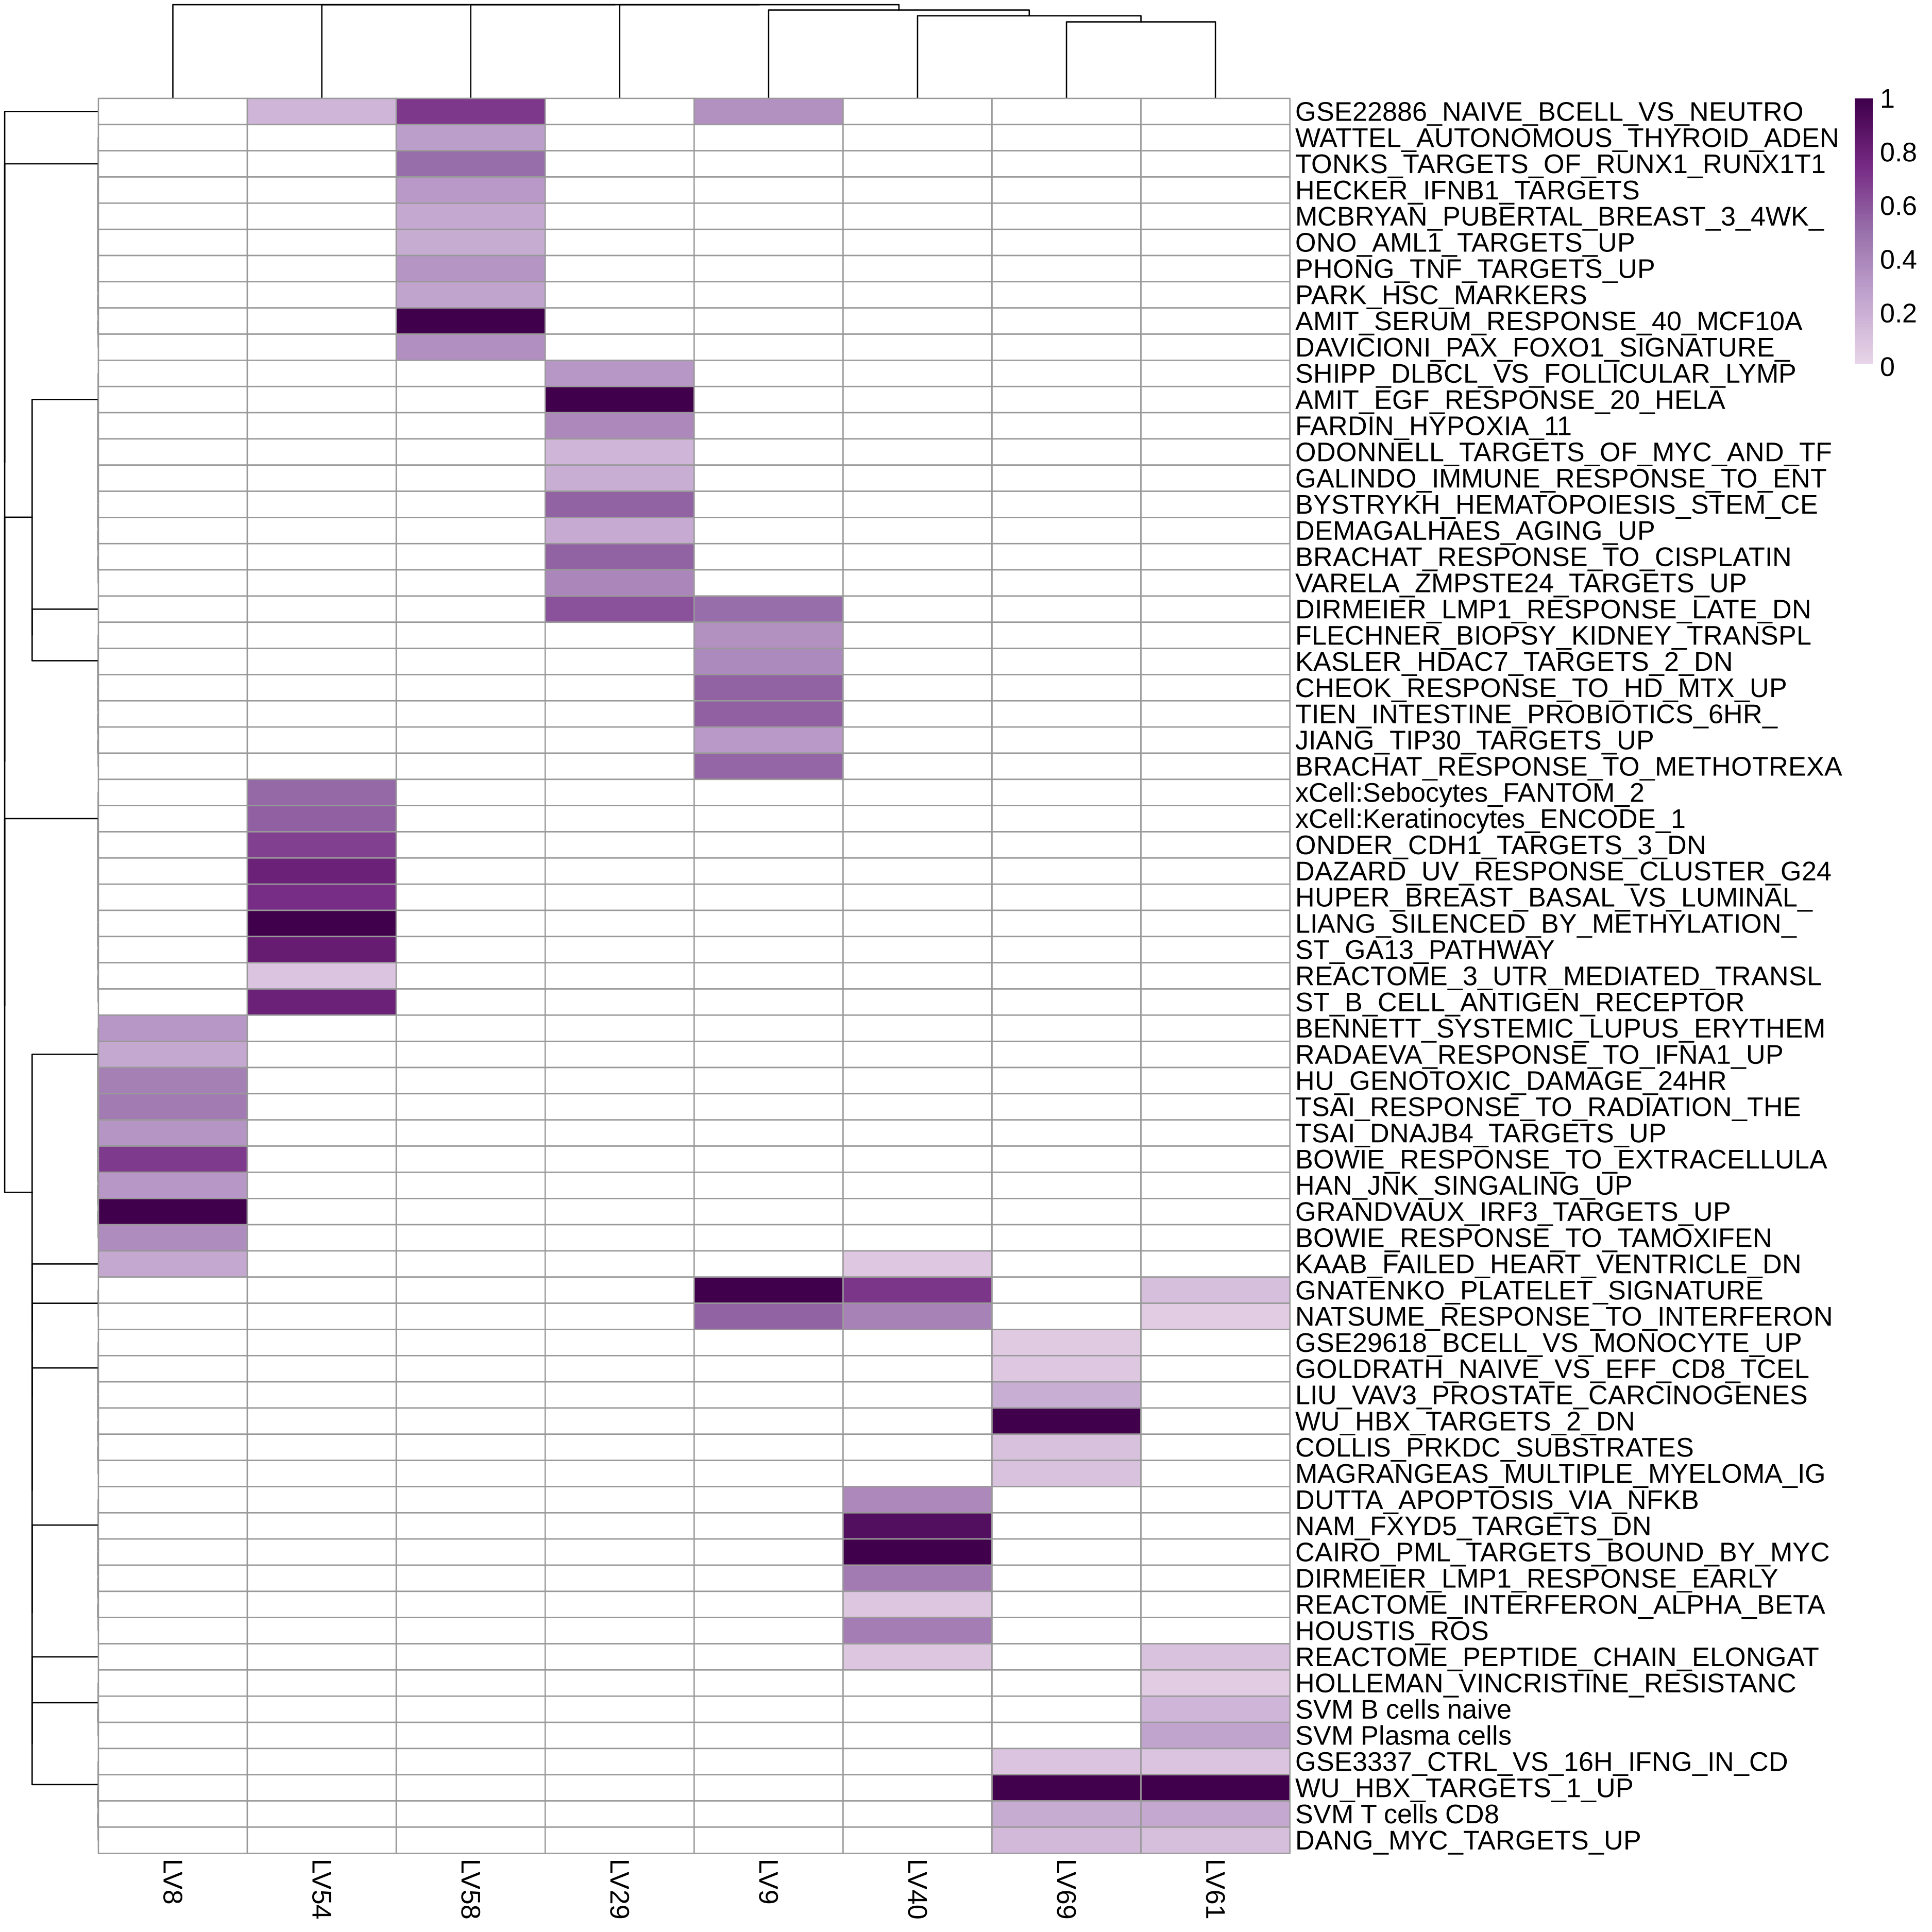

In [155]:
options(repr.plot.width = 15, repr.plot.height = 15, repr.plot.res = 250)

PLIER::plotU(plierRes = htp_plier_model,
             indexCol = c(29, 69, 61, 40, 9, 58, 54, 8),
             top = 10, 
            fontsize = 15)